## This notebook simulates an antidromic stimulus reaching a pool of motoneurons and a renshaw cell.

Pablo Alejandro

In [1]:
import sys
sys.path.insert(0, '..')
import time

import matplotlib.pyplot as plt
%matplotlib notebook
plt.rcParams['figure.figsize']= 7,7
import numpy as np

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from InterneuronPool import InterneuronPool
from SynapsesFactory import SynapsesFactory

In [2]:
conf = Configuration('confAntidromicStimulationofMNandRC.rmto')

pools = dict()
pools[0] = MotorUnitPool(conf, 'SOL')
pools[1] = InterneuronPool(conf, 'RC', 'ext')

for i in xrange(0,len(pools[0].unit)):
    pools[0].unit[i].createStimulus()

Syn = SynapsesFactory(conf, pools)

t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

RC_mV = np.zeros_like(t)
MN_mV = np.zeros_like(t)

tic = time.clock()
for i in xrange(0, len(t)):
    pools[0].atualizeMotorUnitPool(t[i]) # MN pool
    pools[2].atualizePool(t[i]) # RC synaptic Noise
    pools[1].atualizeInterneuronPool(t[i]) # RC pool
    RC_mV[i] = pools[1].v_mV[0] 
    MN_mV[i] = pools[0].v_mV[1] 
toc = time.clock()
print str(toc - tic) + ' seconds'

Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Interneuron Pool of RC ext built
All the 10 synapses were built
Synaptic Noise on RC_ext built
All the 1 synaptic noises were built
12.424834 seconds


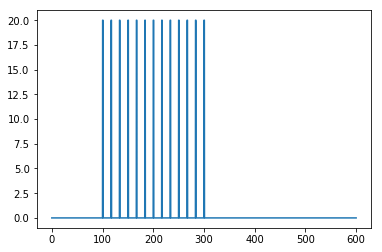

In [3]:
plt.figure()
plt.plot(t, pools[0].unit[0].nerveStimulus_mA)

The antidromic stimulus at the PTN.

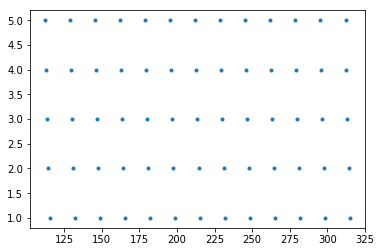

In [4]:
pools[0].listSpikes()
plt.figure()
plt.plot(pools[0].poolSomaSpikes[:, 0],
    pools[0].poolSomaSpikes[:, 1]+1, '.')

The spike times of each MN along the simulation.

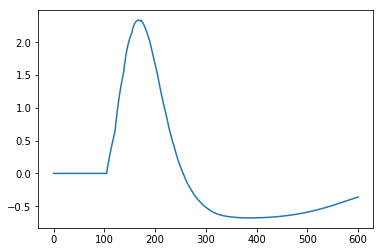

In [5]:
plt.figure()
plt.plot(t, pools[0].Muscle.force, '-')

The force produced.

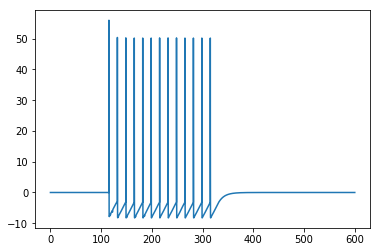

In [6]:
plt.figure()
plt.plot(t, MN_mV, '-')

The membrande potential at the soma of the first motorneuron.

(90, 145)

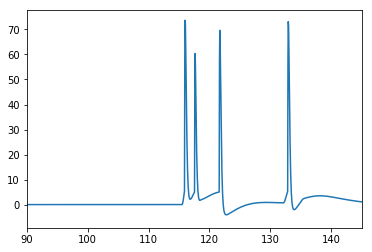

In [7]:
plt.figure()
plt.plot(t, RC_mV, '-')
plt.xlim((90,145))

The membrande potential at the soma of the Renshaw cell.